In [8]:
using Plots

In [9]:
Base.@kwdef struct ASVParams
    v_max::Float64 = 2.5; # maximum speed [m/s]
    v_min::Float64 = 0.0; # minimum speed [m/s]
    k_m::Float64 = 32; # motor multiplier [1]
end
consts = ASVParams();

Base.@kwdef struct Conversions
    Wh2Joules::Float64 = 3600; # convert Wh to Joules [kg m^2 s^{-2}]
    m2km::Float64 = (1/1000); # convert meters to km [km]
end
convs = Conversions();

Given the vehicle max/min speeds, how much power can be consumed?
For reference,
$$
Power = \frac{Energy}{Time}
$$
and
$$
Energy = Power \times Time
$$

The power consumption model of the ASV will be simplified to be
$$
Power = k_m u^3
$$
where $b$ is the state of charge of the vehicle, $k_m$ is a multiplier to scale to the ASV, and $u$ is the speed.

Thus,
$$
Energy = k_m u^3 \Delta T
$$

In [10]:
motor_const = (500)/(2.5 ^ 3)

32.0

To simplify this analysis, we shall make the (not necessarily poor) assumption that $u$ will be constant.

Let us allocate some unit of energy = 100Wh and see what we can do with it. We will establish a relationship between speed and time for this energy allocation. Since we are setting energy to be a constant value, let us rearrange the prior equation
$$
\Delta T = \frac{energy}{k_m u^3}
$$

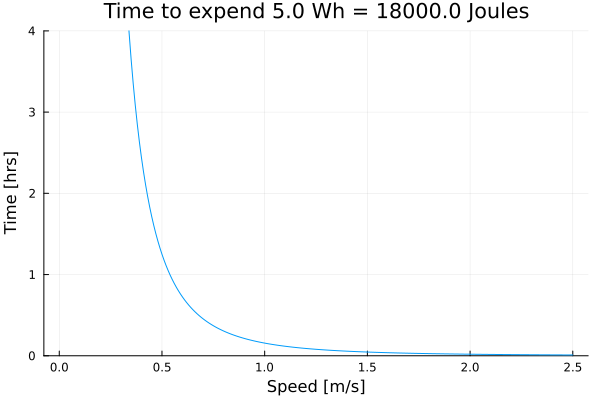

In [11]:
wh_goal = 5.0;
E_alloc = wh_goal * convs.Wh2Joules; # energy allocation in Joules

speeds = consts.v_min:0.01:consts.v_max;
times = E_alloc./(consts.k_m .* (speeds).^3)
times_hours = times ./ (60 * 60)

plot(speeds, times_hours, label=false, xlabel="Speed [m/s]", ylabel="Time [hrs]", title="Time to expend $(wh_goal) Wh = $(E_alloc) Joules")
# plot(speeds, times, label=false, xlabel="Speed [m/s]", ylabel="Time [hrs]", title="Time to expend $(wh_goal) Wh = $(E_alloc) Joules")
ylims!(0, 4)

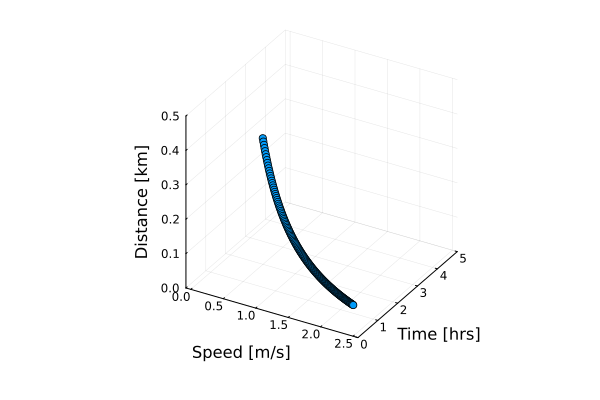

In [12]:
distances = (speeds.*times)*convs.m2km;
scatter3d(speeds, times_hours, distances, label=false, xlabel="Speed [m/s]", ylabel="Time [hrs]", zlabel="Distance [km]")
ylims!(0, 5)
zlims!(0, 0.5)

┌ Info: Saved animation to /tmp/jl_FK1KVaTe3u.gif
└ @ Plots /home/kmgovind/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_FK1KVaTe3u.gif")
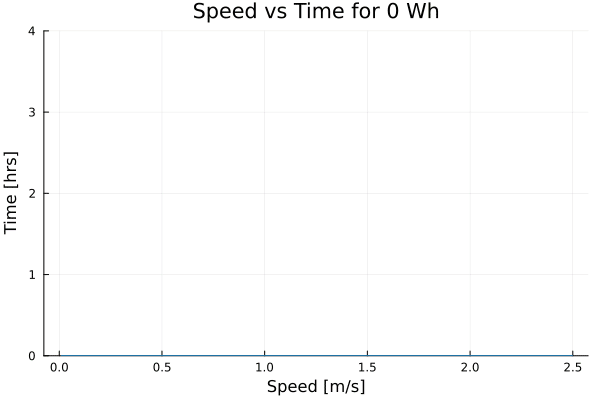

In [18]:
# Creating level sets
plot()
@gif for wh_goal = 0:5:500
    E_alloc = wh_goal * convs.Wh2Joules; # energy allocation in Joules

    speeds = consts.v_min:0.01:consts.v_max;
    times = E_alloc./(consts.k_m .* (speeds).^3)
    plot!(speeds, times./(60*60), label=false, xlabel="Speed [m/s]", ylabel="Time [hrs]", title="Speed vs Time for $(wh_goal) Wh")
    # plot(speeds, times, label=false, xlabel="Speed [m/s]", ylabel="Time [hrs]", title="Time to expend $(wh_goal) Wh = $(E_alloc) Joules")
    ylims!(0, 4)
end

Now, we introduce information dynamics. Particularly in the form of clarity. 

We start with an information field (represented as $q(x)$ where $q$ is the information and $x$ is the position) with some uniformly constant decay.

In [19]:
function circle(x, y, r=1; n=30)
    θ = 0:360÷n:360
    Plots.Shape(r*sind.(θ) .+ x, r*cosd.(θ) .+ y)
end

circle (generic function with 2 methods)

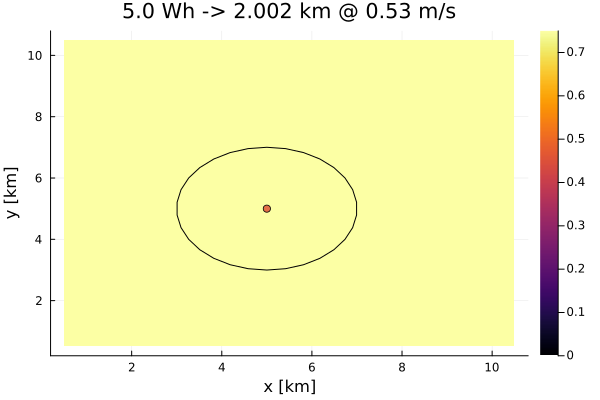

In [32]:
info = 0.75 * ones(10, 10);
heatmap(info)

robot_loc = [5;5]
scatter!([robot_loc[1]], [robot_loc[2]], legend=false)

wh_goal = 5.0;
E_alloc = wh_goal * convs.Wh2Joules; # energy allocation in Joules

speeds = consts.v_min:0.01:consts.v_max;
times = E_alloc./(consts.k_m .* (speeds).^3)
distances = (speeds.*times)*convs.m2km;
idx = findfirst((distances .- 2) .<= 0.01)
travel_radius = circle(robot_loc[1], robot_loc[2], distances[idx])
plot!(travel_radius, color=:transparent, title="$(wh_goal) Wh -> $(round(distances[idx]; digits=3)) km @ $(round(speeds[idx]; digits=3)) m/s")
xlabel!("x [km]")
ylabel!("y [km]")
# plot!(aspect_ratio=:equal)

┌ Info: Saved animation to /tmp/jl_jczMrQbsLc.gif
└ @ Plots /home/kmgovind/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_jczMrQbsLc.gif")
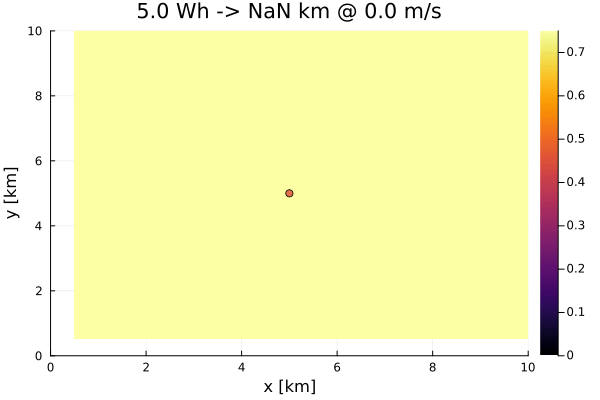

In [36]:
info = 0.75 * ones(10, 10);
heatmap(info)

robot_loc = [5;5]
scatter!([robot_loc[1]], [robot_loc[2]], legend=false)

wh_goal = 5.0;
E_alloc = wh_goal * convs.Wh2Joules; # energy allocation in Joules

speeds = consts.v_min:0.01:consts.v_max;
times = E_alloc./(consts.k_m .* (speeds).^3)
distances = (speeds.*times)*convs.m2km;
@gif for idx in 1:length(distances)
    # idx = findfirst((distances .- distance) .<= 0.01)
    travel_radius = circle(robot_loc[1], robot_loc[2], distances[idx])
    heatmap(info)
    scatter!([robot_loc[1]], [robot_loc[2]], legend=false)
    plot!(travel_radius, color=:transparent, title="$(wh_goal) Wh -> $(round(distances[idx]; digits=3)) km @ $(round(speeds[idx]; digits=3)) m/s")
    xlabel!("x [km]")
    ylabel!("y [km]")
    ylims!(0, 10)
    xlims!(0, 10)
end